# Imports

In [1]:
import sys, os
# from scipy.stats import norm

In [2]:
sys.path.append(os.path.abspath(os.path.join('../utils')))
from ordinal_model.OrdinalRegression import OrdinalRegression, softplus, softplus_inv, plot_model
import autograd.numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from autograd import grad, value_and_grad

# Ordinal Regression Testing

## Sequence State 2--Gaussian perfect separation

### Toy Data

In [115]:
state_2_df = pd.read_csv('../toydata/simulated_data/features_from_state2.csv')
state_2_df

,temperature_1,temperature_2,ordinal_label
0,13.446886,-0.552414,1
1,12.467339,-0.456510,1
2,12.240646,1.487031,3
3,12.920970,1.347114,3
4,12.365956,-0.505576,1
...,...,...,...
995,13.299201,-1.777017,0
996,12.508565,1.482781,3
997,12.692524,0.986925,2
998,12.897209,-0.374903,1


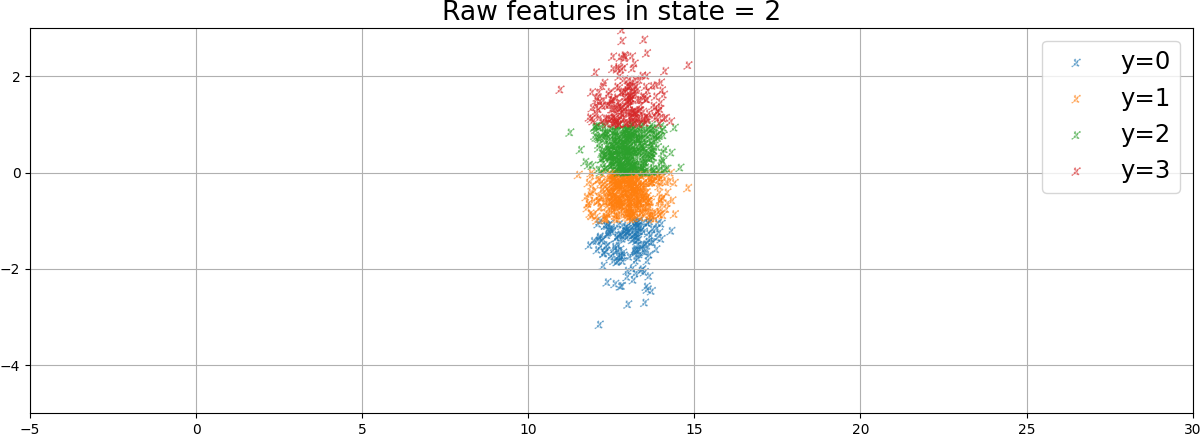

In [116]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state_2.png') 

In [117]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_df[['temperature_1', 'temperature_2']].values
y = state_2_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1000, 2)
[[13.4468864  -0.55241445]
 [12.46733864 -0.45650953]
 [12.24064581  1.48703067]
 ...
 [12.69252415  0.9869254 ]
 [12.89720911 -0.37490277]
 [14.0738536   1.12059795]]
y: (1000,)
[1 1 3 3 1 2 2 1 0 1 2 1 1 2 1 3 2 2 1 0 0 2 2 1 2 1 1 0 2 2 0 0 2 2 1 2 0
 2 2 2 1 3 0 1 1 0 3 1 3 1 3 1 0 2 1 2 2 1 2 2 2 1 3 2 1 0 0 1 1 1 3 1 1 1
 0 2 1 1 2 3 1 2 2 1 2 2 3 1 0 1 0 1 1 2 2 0 0 0 1 2 2 2 2 2 1 0 2 1 3 2 1
 2 3 1 3 3 2 2 0 2 2 0 3 1 3 1 2 1 0 1 2 1 1 2 0 2 2 2 2 1 2 2 1 1 1 3 3 1
 3 3 3 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1 1 1 1 2 1 1 2 3 3 0 1 2 2 0 2 0 2 2
 2 2 1 1 2 3 2 1 1 0 1 2 2 2 0 1 2 0 1 2 2 1 1 2 1 2 3 0 1 3 2 0 2 1 1 0 2
 3 2 1 2 3 2 3 3 2 1 1 3 3 1 0 2 1 2 1 1 1 3 1 2 3 2 1 3 1 3 0 1 3 2 0 1 3
 1 3 2 3 0 2 2 1 1 1 1 3 2 1 2 2 1 3 3 2 2 2 1 3 1 0 1 2 1 3 2 1 2 3 0 3 2
 3 2 1 2 1 0 1 2 0 2 1 2 1 2 1 2 2 2 3 2 1 1 1 0 3 2 2 2 1 3 2 0 2 1 3 2 3
 1 1 3 3 1 0 3 2 1 0 2 2 1 3 2 2 2 3 3 3 2 0 2 1 3 1 0 3 1 1 1 2 1 2 0 3 2
 1 3 0 3 3 2 3 1 2 3 2 2 2 1 1 1 3 0 0 2 2 1 0 2 2 3 2 2 0

## Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.91715472  2.99132472  2.99132472  1.24874122 -0.2733706
 -1.61786309]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.99871728  2.94958722  2.94958722  1.33030379  0.69997141
 -1.54652226]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.92884273  2.98534369  2.98534369  1.26042923 -0.13388953
 -1.60763986]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.92733784  2.98611377  2.98611377  1.25892434 -0.15184843
 -1.60895615]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.92657887  2.98650216  2.98650216  1.25816537 -0.16090573
 -1.60962   ]
PARAMS:
[ 0.541

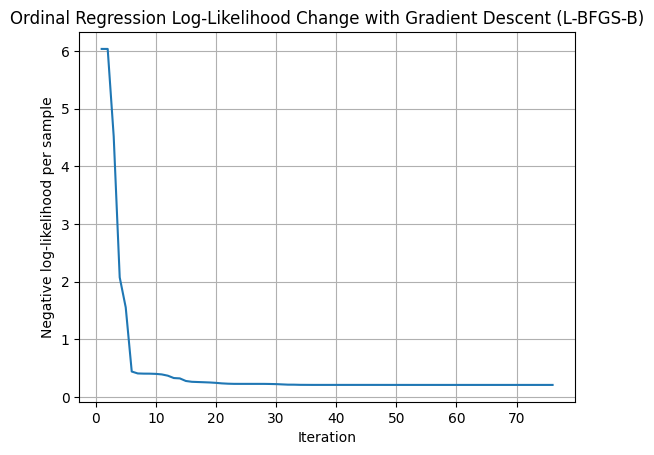

In [126]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)


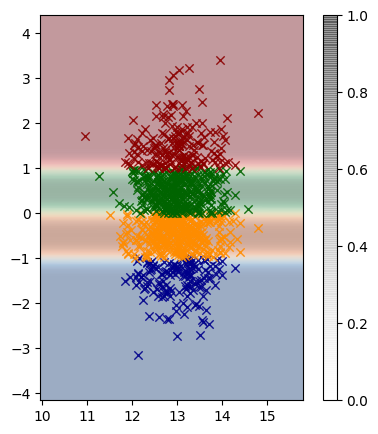

In [127]:
plot_model(clf)

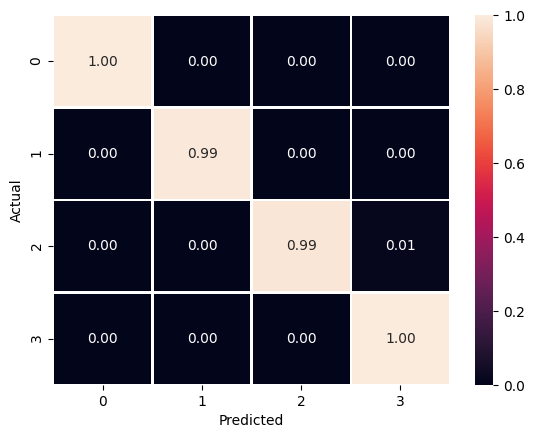

In [128]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

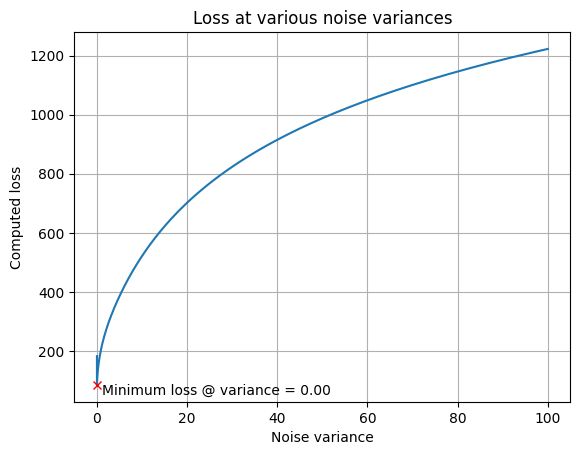

(array([1.00000000e-10, 1.02804473e-10, 1.05687597e-10, 1.08651577e-10,
        1.11698682e-10, 1.14831241e-10, 1.18051653e-10, 1.21362380e-10,
        1.24765955e-10, 1.28264983e-10, 1.31862140e-10, 1.35560179e-10,
        1.39361927e-10, 1.43270295e-10, 1.47288272e-10, 1.51418933e-10,
        1.55665436e-10, 1.60031031e-10, 1.64519059e-10, 1.69132952e-10,
        1.73876240e-10, 1.78752553e-10, 1.83765620e-10, 1.88919278e-10,
        1.94217468e-10, 1.99664245e-10, 2.05263775e-10, 2.11020343e-10,
        2.16938352e-10, 2.23022330e-10, 2.29276931e-10, 2.35706941e-10,
        2.42317279e-10, 2.49113003e-10, 2.56099310e-10, 2.63281547e-10,
        2.70665207e-10, 2.78255940e-10, 2.86059554e-10, 2.94082017e-10,
        3.02329468e-10, 3.10808217e-10, 3.19524751e-10, 3.28485737e-10,
        3.37698031e-10, 3.47168682e-10, 3.56904935e-10, 3.66914238e-10,
        3.77204249e-10, 3.87782841e-10, 3.98658107e-10, 4.09838367e-10,
        4.21332174e-10, 4.33148322e-10, 4.45295851e-10, 4.577840

In [129]:
clf.grid_search_variance()

## Sequence State 2--Gaussian with label noise

### Toy Data

In [ ]:
state_2_with_noise_df = pd.read_csv('../toydata/simulated_data/features_from_state2_with_noise.csv')
state_2_with_noise_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state2_with_noise.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_with_noise_df[['temperature_1', 'temperature_2']].values
y = state_2_with_noise_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = None, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Crescent Shapes

### Toy Data

In [ ]:
cresent_df = pd.read_csv('../toydata/ordinal_data/crescent_shapes_4_labels.csv')
cresent_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/crescent_shapes_4_labels.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = cresent_df[['x1', 'x2']].values
y = cresent_df['label'].values.astype(int)
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Circles

### Toy Data, Point Density Factor = 1

In [130]:
circles_df = pd.read_csv('../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.csv')
circles_df

,x1,x2,ordinal_label
0,0.375490,0.153511,0
1,0.006069,-0.246922,0
2,0.323332,0.629520,0
3,-0.383603,0.867202,0
4,-0.378044,-0.776840,0
...,...,...,...
1781,0.126958,-4.188304,3
1782,3.573747,0.681222,3
1783,-3.751135,-0.253749,3
1784,-0.606367,2.853466,3


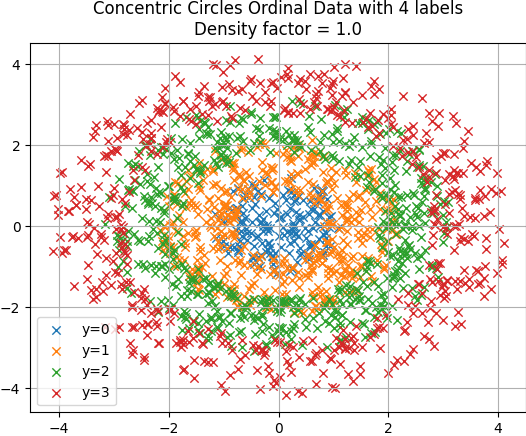

In [131]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.png') 

In [132]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = circles_df[['x1', 'x2']].values
y = circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1786, 2)
[[ 0.37549009  0.1535108 ]
 [ 0.006069   -0.24692199]
 [ 0.32333183  0.62951965]
 ...
 [-3.75113471 -0.25374931]
 [-0.60636748  2.85346599]
 [ 2.79673792  2.60042228]]
y: (1786,)
[0 0 0 ... 3 3 3]


### Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.74547205  3.050018    2.94950777  1.07705856  0.3082141
 -0.71202745]
PARAMS:
[ 0.54132485 -2.74547205  3.050018    2.94950777  1.07705856  0.3082141
 -0.71202745]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -1.80832945  2.98901638  2.30923399  0.1389586  -2.13220442
  4.52722452]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.57837568  3.03914116  2.83534432  0.90979148 -0.12692255
  0.2221527 ]
PARAMS:
[ 0.54132485 -2.57837568  3.03914116  2.83534432  0.90979148 -0.12692255
  0.2221527 ]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.6395639   2.89469362 

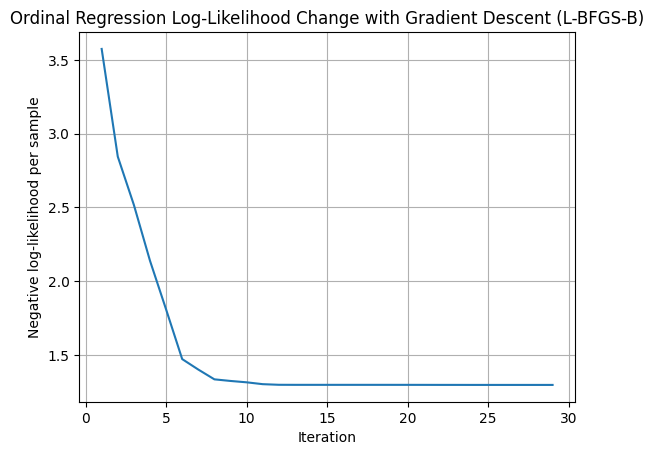

In [133]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)


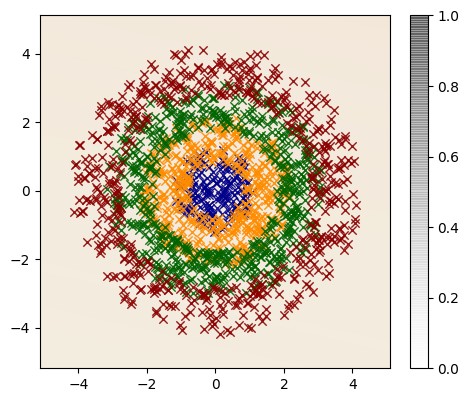

In [134]:
plot_model(clf)

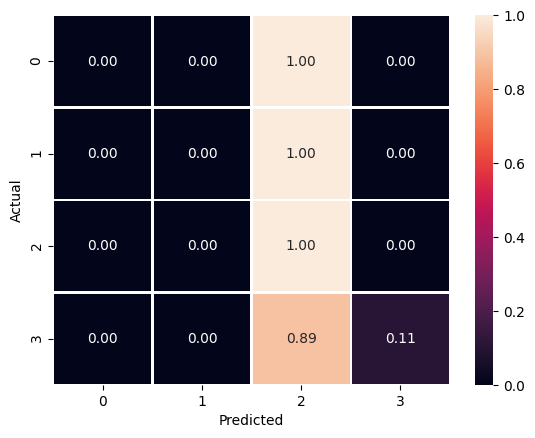

In [136]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [137]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

,x1,x2,ordinal_label
0,0.375490,0.153511,0
1,0.006069,-0.246922,0
2,0.323332,0.629520,0
3,0.187678,-0.673366,0
4,0.565982,-0.477484,0
...,...,...,...
901,1.991824,2.656294,3
902,0.417112,-4.132877,3
903,0.126958,-4.188304,3
904,3.573747,0.681222,3


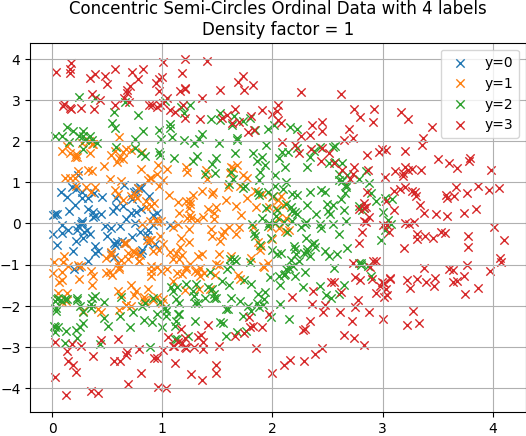

In [138]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [139]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (906, 2)
[[ 0.37549009  0.1535108 ]
 [ 0.006069   -0.24692199]
 [ 0.32333183  0.62951965]
 ...
 [ 0.12695832 -4.18830444]
 [ 3.5737472   0.68122152]
 [ 2.79673792  2.60042228]]
y: (906,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

### Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 9.9999546  -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 9.9999546  -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 9.9999546  -2.80253723  3.09860243  3.00293036  1.13412374  0.71055285
 -0.59846997]
PARAMS:
[ 9.9999546  -2.80253723  3.09860243  3.00293036  1.13412374  0.71055285
 -0.59846997]
PARAMS:
Autograd ArrayBox with value [ 9.9999546  -2.59194678  3.22415106  3.01795151  0.90894184  1.06884435
  0.18287837]
PARAMS:
[ 9.9999546  -2.59194678  3.22415106  3.01795151  0.90894184  1.06884435
  0.18287837]
PARAMS:
Autograd ArrayBox with value [ 9.9999546  -2.41052445  3.3391781   3.06140851  0.70941766  1.2029107
  0.16958552]
PARAMS:
[ 9.9999546  -2.41052445  3.3391781   3.06140851  0.70941766  1.2

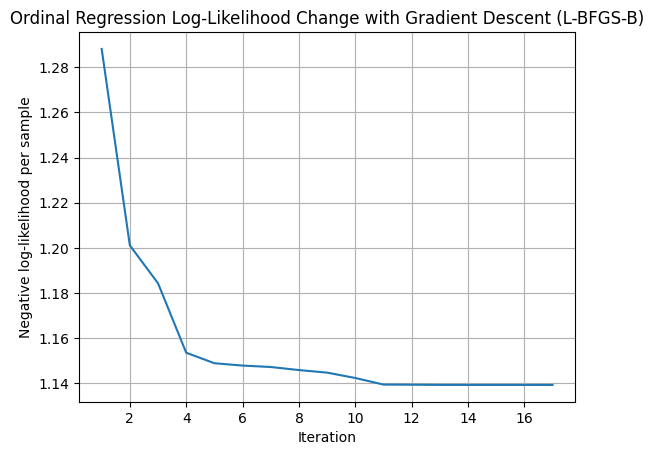

In [144]:
clf = OrdinalRegression(noise_variance = 10, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)


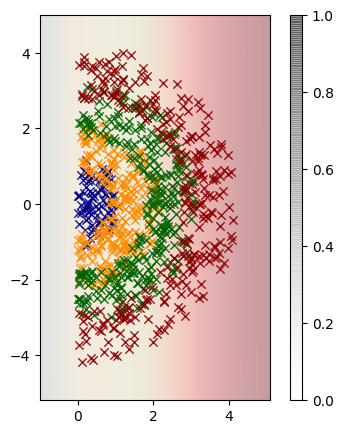

In [145]:
plot_model(clf)

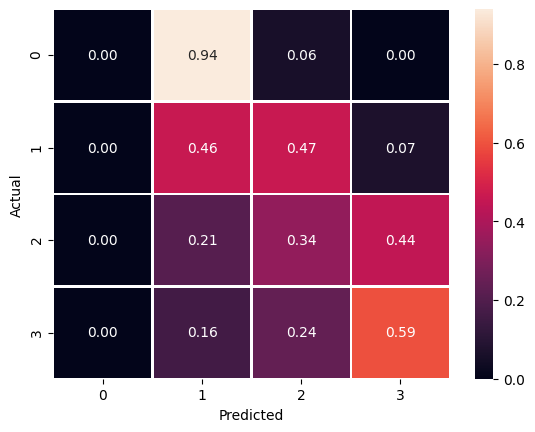

In [146]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Stacked Gaussians

### Toy Data, Point Density Factor = 1, Mean scale = 4

In [148]:
stacked_gaussian_df = pd.read_csv('../toydata/ordinal_data/stacked_gaussian_4_labels_1_densityfactor.csv')
stacked_gaussian_df

,x1,x2,ordinal_label
0,0.715279,1.883148,0
1,-0.008384,-2.185526,0
2,-0.720086,0.878702,0
3,0.108549,0.375490,0
4,-0.174600,0.006069,0
...,...,...,...
1995,1.150269,13.570840,3
1996,0.488751,12.953526,3
1997,-1.498064,12.627589,3
1998,1.287536,13.271711,3


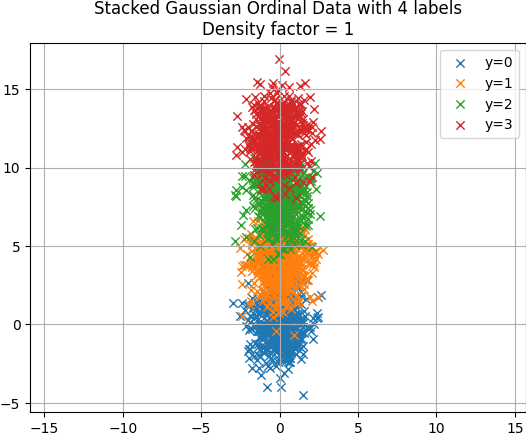

In [149]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/stacked_gaussian_4_labels_1_densityfactor.png') 

In [150]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = stacked_gaussian_df[['x1', 'x2']].values
y = stacked_gaussian_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (2000, 2)
[[ 7.15278974e-01  1.88314769e+00]
 [-8.38384993e-03 -2.18552605e+00]
 [-7.20085561e-01  8.78701761e-01]
 ...
 [-1.49806385e+00  1.26275894e+01]
 [ 1.28753594e+00  1.32717106e+01]
 [-5.48980805e-02  1.09671385e+01]]
y: (2000,)
[0 0 0 ... 3 3 3]


### Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[-4.60016602 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [-4.60016602 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [-4.60016602 -3.19595449  3.03024303  2.94693905  1.52754099  0.88721803
 -0.60358025]
PARAMS:
Autograd ArrayBox with value [-4.60016602 -3.08743014  2.98521036  2.94804214  1.41901665  0.79199402
 -1.125183  ]
PARAMS:
Autograd ArrayBox with value [-4.60016602 -3.1771763   3.02245093  2.94712992  1.5087628   0.87074122
 -0.69383423]
PARAMS:
[-4.60016602 -3.1771763   3.02245093  2.94712992  1.5087628   0.87074122
 -0.69383423]
PARAMS:
Autograd ArrayBox with value [-4.60016602 -3.09146207  3.17484128  2.94646582  1.42313673  0.65499452
 -0.75862308]
PARAMS:
[-4.60016602 -3.09146207  3.1748412

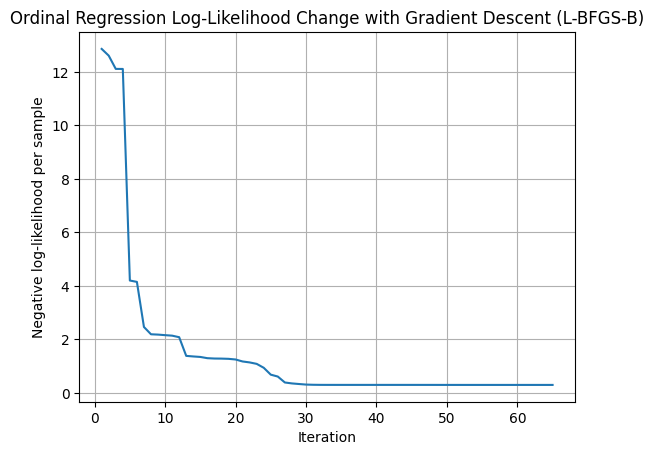

In [172]:
clf = OrdinalRegression(noise_variance = 0.01, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)


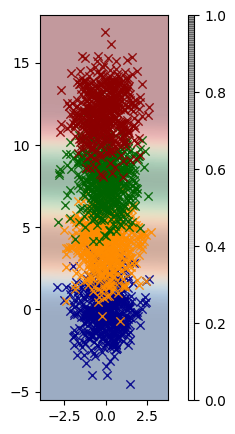

In [173]:
plot_model(clf)

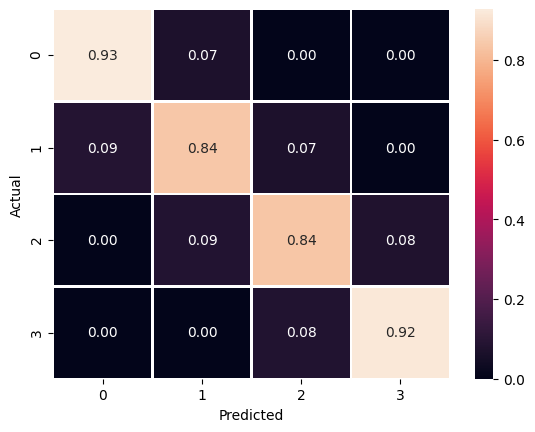

In [174]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

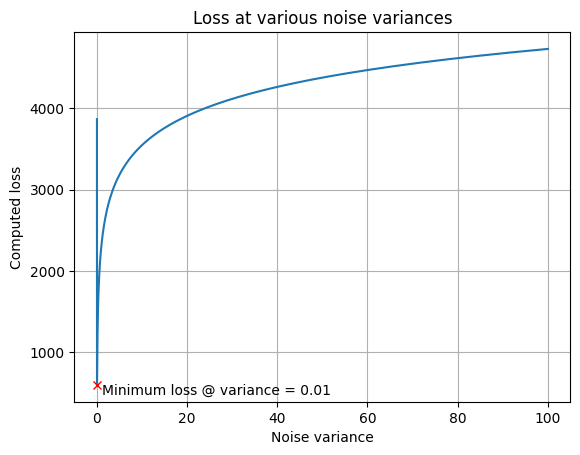

In [175]:
variances, losses = clf.grid_search_variance()

In [176]:
np.min(losses)

595.9112108732114

### Toy Data, Point Density Factor = 0.5, Mean scale = 2

In [177]:
stacked_gaussian_df = pd.read_csv('../toydata/ordinal_data/stacked_gaussian_4_labels_0.5_densityfactor_2_meanscale.csv')
stacked_gaussian_df

,x1,x2,ordinal_label
0,0.715279,1.883148,0
1,-0.008384,-2.185526,0
2,-0.720086,0.878702,0
3,0.108549,0.375490,0
4,-0.174600,0.006069,0
...,...,...,...
995,0.293705,6.755525,3
996,-1.303890,3.729588,3
997,0.633243,6.732859,3
998,0.372233,7.630058,3


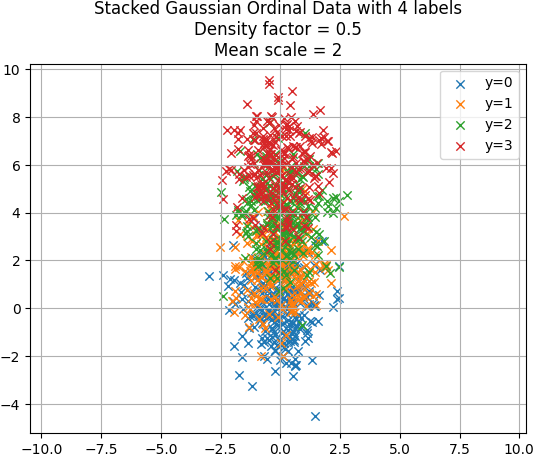

In [178]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/stacked_gaussian_4_labels_0.5_densityfactor_2_meanscale.png') 

In [179]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = stacked_gaussian_df[['x1', 'x2']].values
y = stacked_gaussian_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1000, 2)
[[ 0.71527897  1.88314769]
 [-0.00838385 -2.18552605]
 [-0.72008556  0.87870176]
 ...
 [ 0.63324275  6.73285912]
 [ 0.37223338  7.6300583 ]
 [ 1.71027507  6.86584687]]
y: (1000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### Model

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[-4.60016602 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [-4.60016602 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [-4.60016602 -2.50687924  3.56351233  2.95375495  0.83846574  0.94795432
 -1.25940676]
PARAMS:
[-4.60016602 -2.50687924  3.56351233  2.95375495  0.83846574  0.94795432
 -1.25940676]
PARAMS:
Autograd ArrayBox with value [-4.60016602 -1.18008703  5.38063339  2.96522434 -0.48975733  1.5616151
  0.03073181]
PARAMS:
Autograd ArrayBox with value [-4.60016602  4.12708179 12.64911759  3.0111019  -5.80264961  4.01625822
  5.19128608]
PARAMS:
[-4.60016602  4.12708179 12.64911759  3.0111019  -5.80264961  4.01625822
  5.19128608]
PARAMS:
Autograd ArrayBox with value [-4.60016602  6.97944297 10.34987148

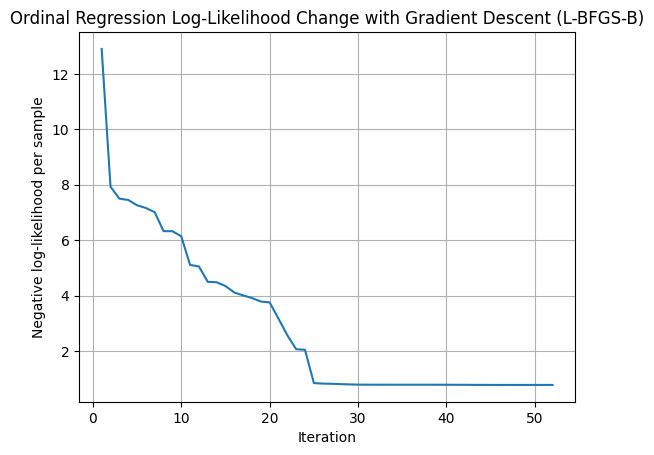

In [195]:
clf = OrdinalRegression(noise_variance = 0.01, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)


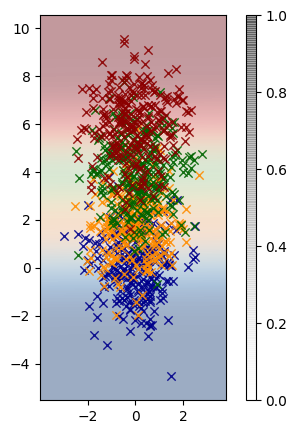

In [196]:
plot_model(clf)

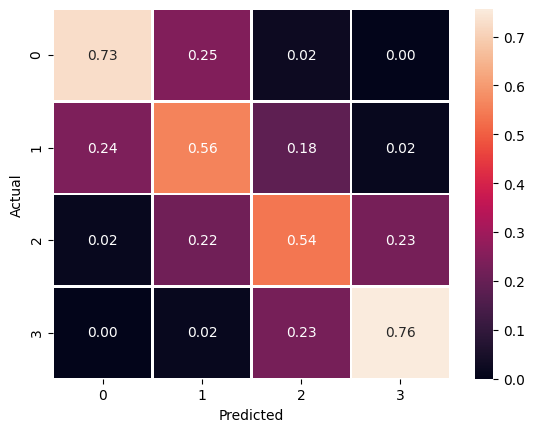

In [197]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

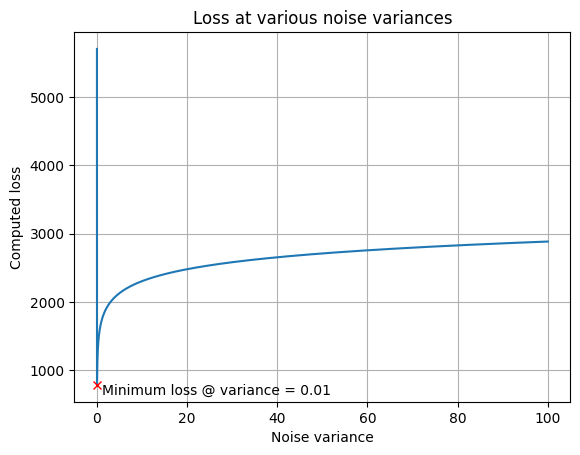

In [198]:
variances, losses = clf.grid_search_variance()

In [199]:
np.min(losses)

787.2658901117217

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [ ]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

# Misc. Testing

In [10]:
X = np.array(
    [
        [-80,-90,-100],
        [4,5,6],
        [80,90,100],
        [-81,-93,-99],
        [4.2,5.1,6.3],
        [81,93,99],
        [-87,-94,-98],
        [4.1,5.2,6.5],
        [87,94,98],
    ]
)
y = np.array(
    [
        0,
        1,
        2,
        0,
        1,
        2,
        0,
        1,
        2,
    ]
)
w_inits = []
for i in range(100):
    w_inits.append(np.random.rand(3) * np.random.randint(0,10))

In [ ]:
clf = OrdinalRegression()
clf.set_params(R = 3, N = 3, cut_points  = np.array([-np.inf, -3, 3, np.inf]))

In [ ]:
# for w in w_inits:
#     print(clf.log_likelihood(w, X, y))

In [ ]:
clf.fit(X, y)

In [ ]:
best_w = clf.w

In [ ]:
clf.predict(X)

## Softplus

In [ ]:
test_arr = np.absolute(np.random.normal(size=3))
print(test_arr)
inverse_arr = softplus_inv(test_arr)
print(inverse_arr)
recovered = softplus(inverse_arr)
print(recovered)

In [ ]:
softplus_inv(0.5969)

In [ ]:
softplus(np.array([1,2,3]))

In [ ]:
arr = np.array([1,2,10, 50])

In [ ]:
arr.shape

In [ ]:
softplus(arr)

In [ ]:
np.array(1)[np.newaxis].shape